In [1]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Goglo4k\\Desktop\\archive\\dataset.csv')
#Данные указывающие на данные о Биткоине в различные дни торгов.
#Ссылка на датасет: https://www.kaggle.com/datasets/adilbhatti/bitcoin-and-fear-and-greed
df.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume
0,2018-02-01,30.0,Fear,9170.540039,9959400448
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712
2,2018-02-03,40.0,Fear,9174.910156,7263790080
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984


In [2]:
df['BTC_total_cost'] = df['BTC_Closing'] * df['BTC_Volume']
#Добавляем общую стоимость рынка биткоина как новый атрибут
df.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume,BTC_total_cost
0,2018-02-01,30.0,Fear,9170.540039,9959400448,9.133308e+13
1,2018-02-02,15.0,Extreme Fear,8830.750000,12726899712,1.123881e+14
2,2018-02-03,40.0,Fear,9174.910156,7263790080,6.664462e+13
3,2018-02-04,24.0,Extreme Fear,8277.009766,7073549824,5.854784e+13
4,2018-02-05,11.0,Extreme Fear,6955.270020,9285289984,6.458170e+13


In [3]:
df.isnull().sum()
#Обойдем датасет на наличие пропущенных значений

Date                    0
Value                   3
Value_Classification    3
BTC_Closing             0
BTC_Volume              0
BTC_total_cost          0
dtype: int64

In [4]:
Null_df = df[(df['Value'].isnull()) | (df['Value_Classification'].isnull())]
#Так как в открытых источниках найти информацию по указанным датам не удалось - определим строки для их дальнейшего удаления
Null_df.head()

,Date,Value,Value_Classification,BTC_Closing,BTC_Volume,BTC_total_cost
72,2018-04-14,NaN,NaN,7986.240234,5191430144,4.146001e+13
73,2018-04-15,NaN,NaN,8329.110352,5244480000,4.368185e+13
74,2018-04-16,NaN,NaN,8058.669922,5631309824,4.538087e+13


In [5]:
for index in Null_df.index:
    df.drop(index, axis = 0, inplace = True);

df.isnull().sum()
#Удаляем строки с пропущенными значениями и перепроверяем таблицу

Date                    0
Value                   0
Value_Classification    0
BTC_Closing             0
BTC_Volume              0
BTC_total_cost          0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

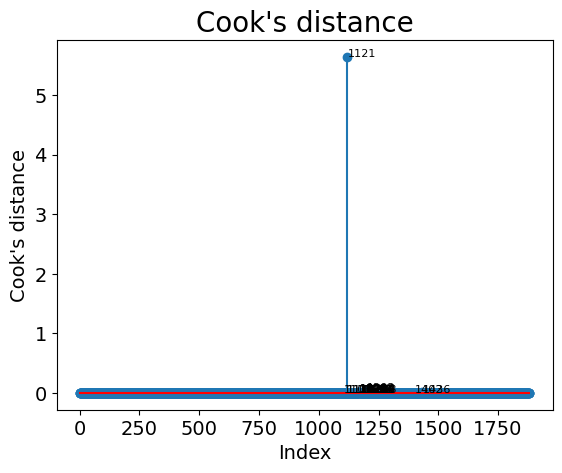

In [7]:
#Найдем выбросы
threshold = 4/len(df.index)

f = 'Value ~ BTC_total_cost'
model = ols(formula=f, data=df).fit()

#Рассчет расстояния Кука
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance
    

influencial_data = distance[distance > threshold]

for index, value in influencial_data.items():
    plt.text(index, value, str(index), fontsize=8)
    df.drop(index, axis = 0, inplace = True)
        
plt.stem(distance, basefmt=" ")
plt.hlines(threshold, -2, df.index[-1], 'r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Index', fontsize=14)
plt.ylabel('Cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);  

In [8]:
print(len(influencial_data.index));
#В данном датасете при расчёте расстояния Кука было зарегестрировано 25 выбросов. Однако, ручная проверка данных
#на корректность и сравнение с данными имеющимися в других доступных источниках показали, что данные выбросы
#не являются ошибками, а вызваны естественными причинами, которые не анализируются в данной выборке.
#Например, самое "критическое" значение - 1121 регестрируется 21-ым февраля 2021-года. Тогда Биткоин рекордно обвалился
#предположительно из-за комментариев главы Минфина США Джанет Йеллен, Илона Маска или Биллла Гейста

#Тем не менее, для простоты дальнейшего анализа все указанныые выбросы были удалены в предыдущем блоке

25


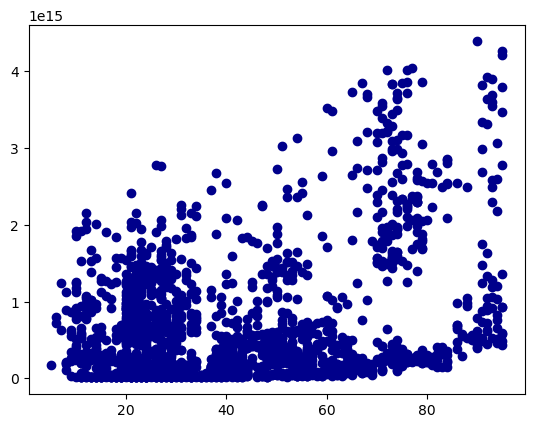

In [9]:
plt.scatter(x=df['Value'], y=df['BTC_total_cost'], c='DarkBlue')
plt.show();

#На данном графике наблюдается 3 кластера с центрами: около 1 + 25, 0.3 + 50, 3 + 75

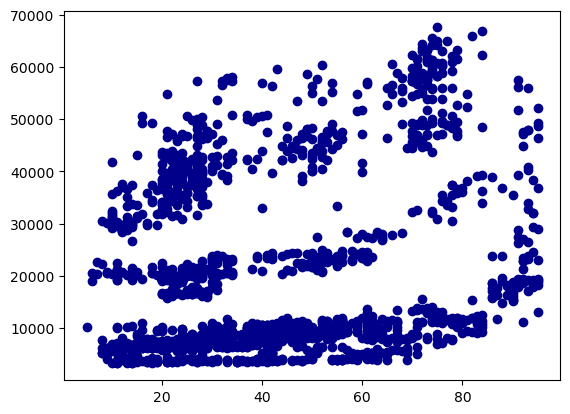

In [10]:
plt.scatter(x=df['Value'], y=df['BTC_Closing'], c='DarkBlue')
plt.show();

#На данном графике наблюдается 7 кластеров с центрами: 40000 + 25, 45000 + 50, 55000 + 70, 20000 + 20, 20000 + 50, 35000 + 80
#и вся нижняя часть графика

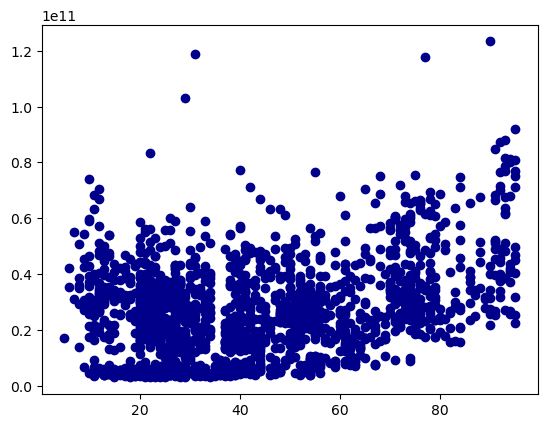

In [11]:
plt.scatter(x=df['Value'], y=df['BTC_Volume'], c='DarkBlue')
plt.show();

#На данном графике наблюдается 3 кластера с центрами: 0.3 + 25, 0.3 + 50, 0.3 + 75

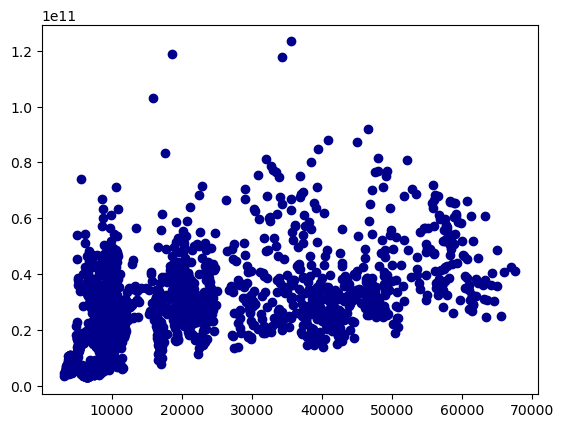

In [12]:
plt.scatter(x=df['BTC_Closing'], y=df['BTC_Volume'], c='DarkBlue')
plt.show();

#На данном графике наблюдается три кластера с центрами: 0.3 + 10000, 0.3 + 20000, 0.3 + 40000

In [13]:
from sklearn.cluster import KMeans
import numpy as np

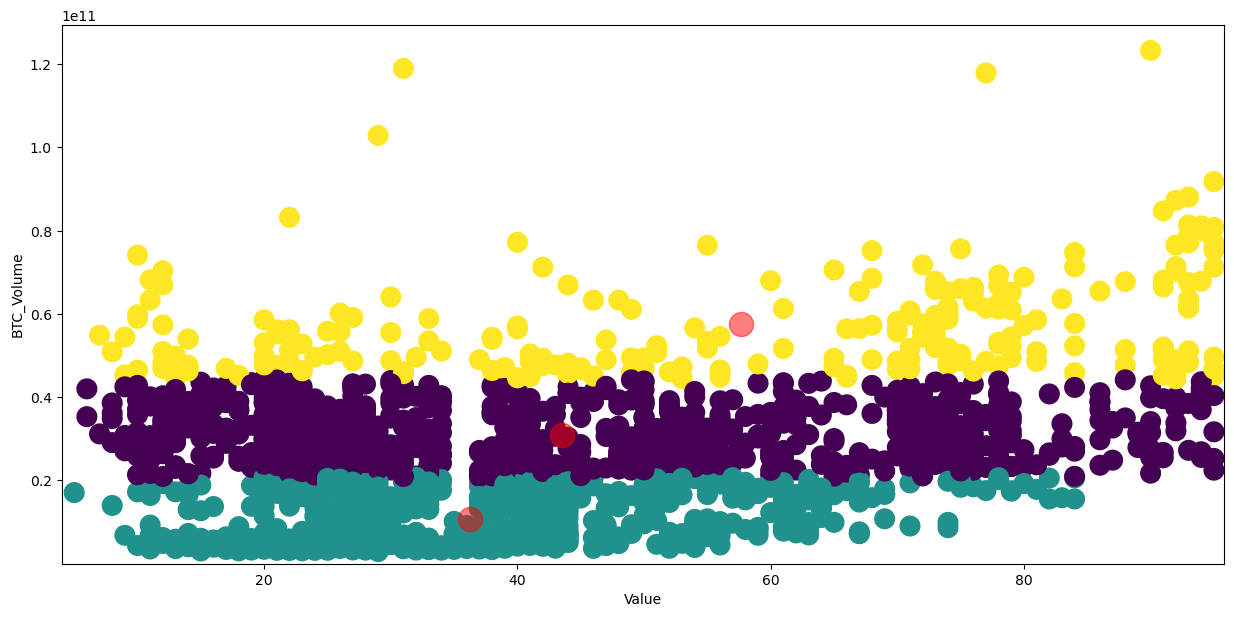

In [14]:
X1 = df[['Value' , 'BTC_Volume']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.2
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

y_min = y_min // 1000000000
y_max = y_max // 1000000000 + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Value' ,y = 'BTC_Volume' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('BTC_Volume') , plt.xlabel('Value')
plt.show()

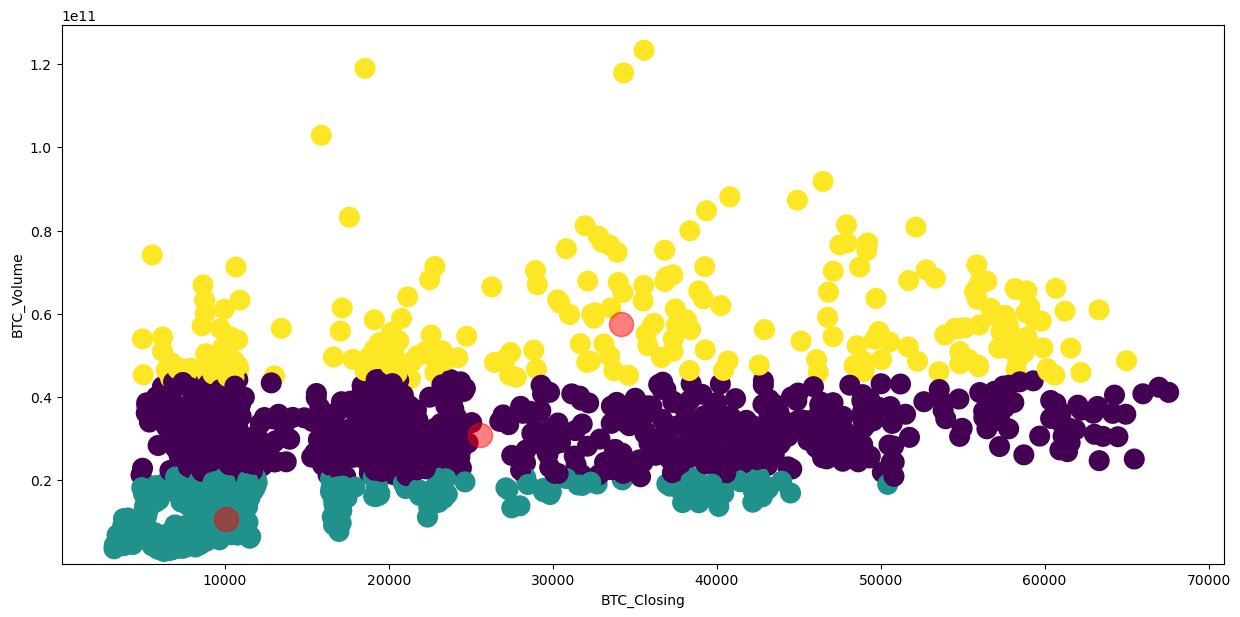

In [15]:
X1 = df[['BTC_Closing' , 'BTC_Volume']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.2
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x_min = x_min // 100
x_max = x_max // 100 + 1
y_min = y_min // 1000000000
y_max = y_max // 1000000000 + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'BTC_Closing' ,y = 'BTC_Volume' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('BTC_Volume') , plt.xlabel('BTC_Closing')
plt.show()

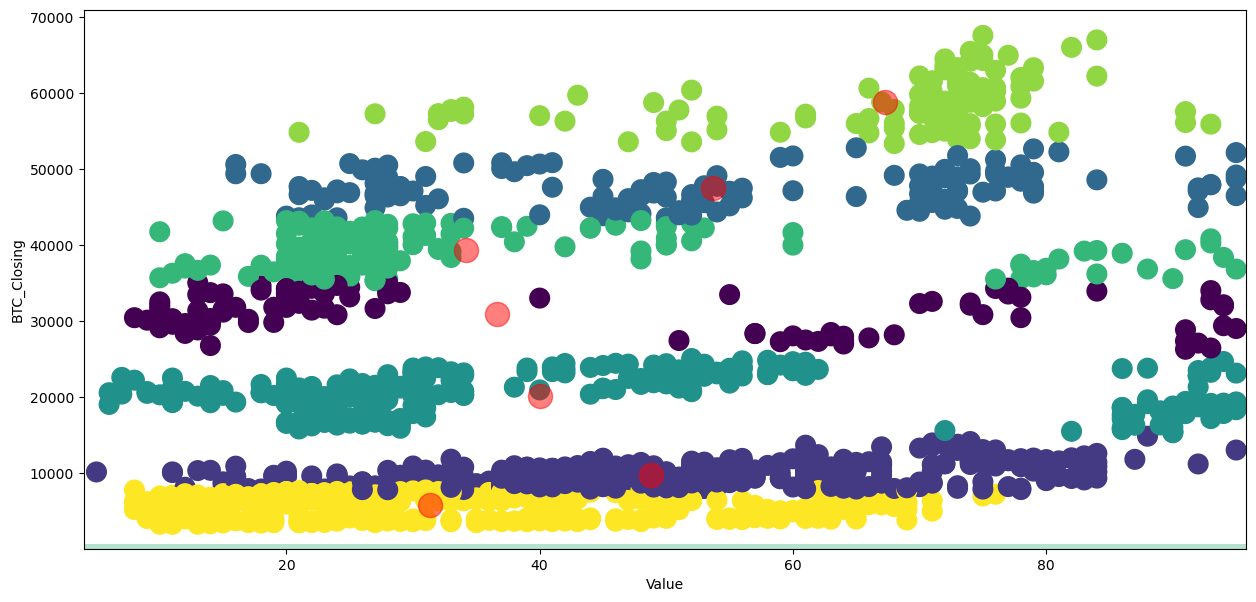

In [16]:
X1 = df[['Value' , 'BTC_Closing']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.2
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

y_min = y_min // 100
y_max = y_max // 100 + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Value' ,y = 'BTC_Closing' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('BTC_Closing') , plt.xlabel('Value')
plt.show()

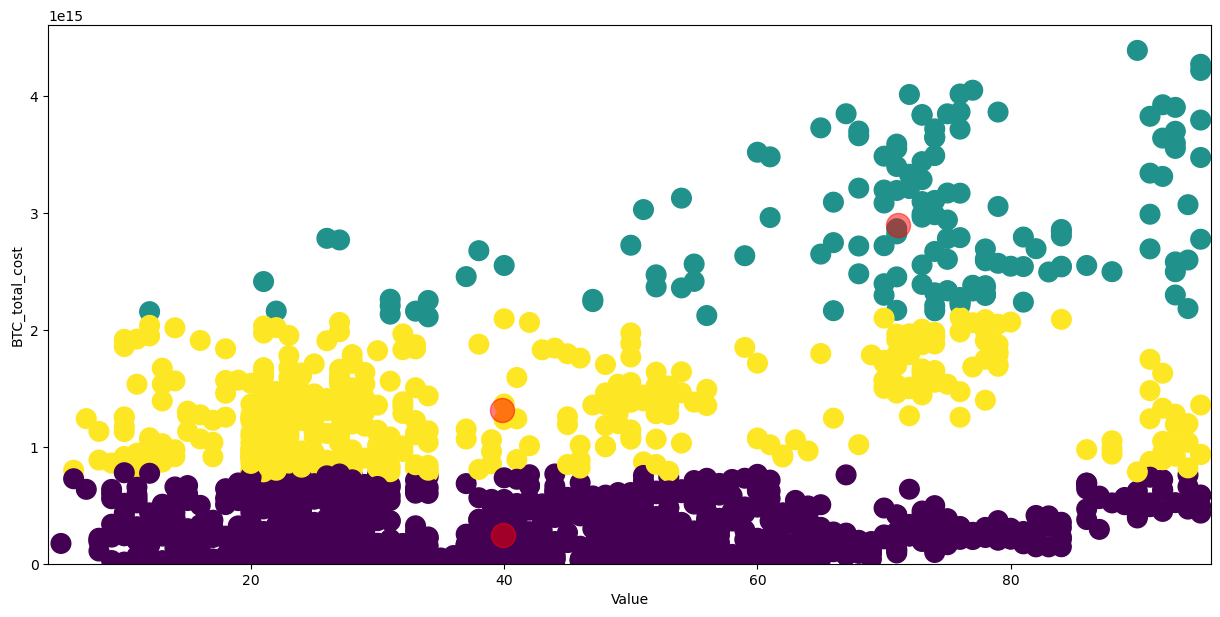

In [17]:
X1 = df[['Value' , 'BTC_total_cost']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.2
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

y_min = y_min // 10000000000000
y_max = y_max // 10000000000000 + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Value' ,y = 'BTC_total_cost' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('BTC_total_cost') , plt.xlabel('Value')
plt.show()